# Preparing Time Series from Wide-Form Data
Author: Kim Hazed Delfino

## Imports 

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


## Load the Data

In [316]:
path = r'C:\Users\kdelfino\Documents\GitHub\Preparing-Time-Series-from-Wide-Form-Data\City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month - City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv'
df = pd.read_csv(path)
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22462,236350,28439,Palisades,city,TX,TX,"Amarillo, TX",Randall County,NaN,NaN,...,198490.0,198467.0,196420.0,192002.0,191634.0,189383.0,191134.0,191343.0,192384.0,192110.0
22463,40403,28439,Port Mansfield,city,TX,TX,"Raymondville, TX",Willacy County,NaN,NaN,...,229251.0,232984.0,238245.0,240154.0,242470.0,243119.0,249098.0,255572.0,261910.0,264685.0
22464,54740,28439,Tribes Hill,city,NY,NY,"Amsterdam, NY",Montgomery County,53380.0,53662.0,...,132490.0,134951.0,137470.0,137430.0,137413.0,137615.0,138908.0,140096.0,141573.0,142438.0
22465,249186,28439,Derby Center,city,VT,VT,NaN,Orleans County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,258191.0,261607.0,264571.0,266255.0


In [317]:
# Create subset of df with only top4 Largest Cities
top4_df = df.loc[:3,:]
top4_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [318]:
# Shift the date columns into row using melt
cols_to_keep = ["RegionID", "SizeRank", "RegionName",
                "RegionType", "StateName", "State",
                "Metro", "CountyName"]
melted = pd.melt(top4_df,id_vars=cols_to_keep,value_name="Avg_House_Value", var_name="Date")
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Avg_House_Value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [319]:
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RegionID         1092 non-null   int64  
 1   SizeRank         1092 non-null   int64  
 2   RegionName       1092 non-null   object 
 3   RegionType       1092 non-null   object 
 4   StateName        1092 non-null   object 
 5   State            1092 non-null   object 
 6   Metro            1092 non-null   object 
 7   CountyName       1092 non-null   object 
 8   Date             1092 non-null   object 
 9   Avg_House_Value  1087 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 85.4+ KB


In [320]:
# Check for missing values
melted.isna().sum()

RegionID           0
SizeRank           0
RegionName         0
RegionType         0
StateName          0
State              0
Metro              0
CountyName         0
Date               0
Avg_House_Value    5
dtype: int64

- looks like we have missing values on our Size feature, we can use interpolate method to fill that feature since size has wide range of values

In [321]:
# Fill missing values
melted["Avg_House_Value"] = melted["Avg_House_Value"].interpolate()

# Double check
melted.isna().sum()

RegionID           0
SizeRank           0
RegionName         0
RegionType         0
StateName          0
State              0
Metro              0
CountyName         0
Date               0
Avg_House_Value    0
dtype: int64

In [322]:
# Convert Date into datetime dtype
melted['Date'] = pd.to_datetime(melted['Date'])
melted['Date']

0      2000-01-31
1      2000-01-31
2      2000-01-31
3      2000-01-31
4      2000-02-29
          ...    
1087   2022-08-31
1088   2022-09-30
1089   2022-09-30
1090   2022-09-30
1091   2022-09-30
Name: Date, Length: 1092, dtype: datetime64[ns]

In [323]:
# Set date as index
melted = melted.set_index('Date')
melted.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Avg_House_Value
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
2000-02-29,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234401.0
2000-02-29,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109079.0
2000-02-29,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166536.0
2000-03-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,257207.0


In [324]:
# Resample df to monthly and groupby city
ts = melted.groupby('RegionName').resample('M').last()["Avg_House_Value"]
ts

RegionName  Date      
Chicago     2000-01-31    166139.0
            2000-02-29    166536.0
            2000-03-31    167368.0
            2000-04-30    168826.0
            2000-05-31    170499.0
                            ...   
New York    2022-05-31    768797.0
            2022-06-30    773944.0
            2022-07-31    777692.0
            2022-08-31    779960.0
            2022-09-30    781622.0
Name: Avg_House_Value, Length: 1092, dtype: float64

In [325]:
# Func to convert thousands into K
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"

# Create the formatter
fmt_thous = mticks.FuncFormatter(thousands)

In [326]:
# Unstack each city
unstacked = ts.unstack(0)

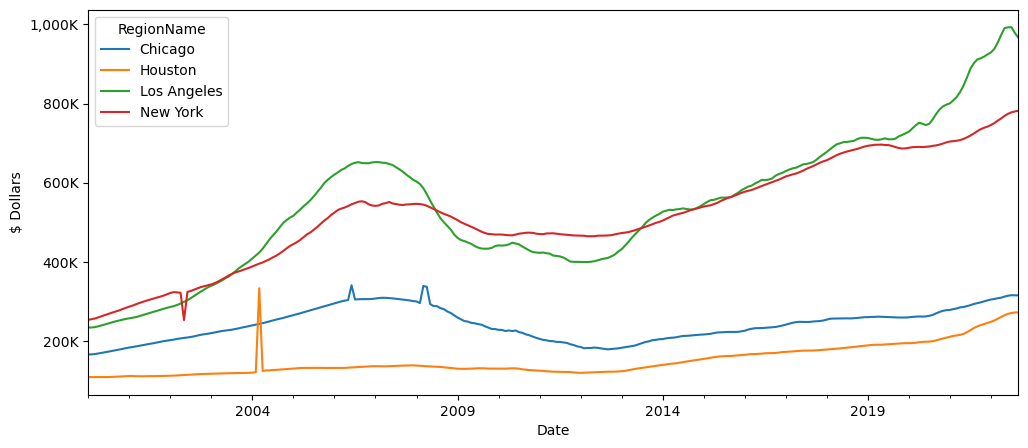

In [339]:
# Plot all cities
fig, ax = plt.subplots(figsize=(12,5))
unstacked.plot(ax=ax)
ax.yaxis.set_major_formatter(fmt_thous)
ax.set_ylabel('$ Dollars');

### Answer the following 2 questions using pandas:
- 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?
Hint: You can use the unstacked dataframe or use pd.IndexSlice with the multiindex. 
- 2) How much did the home values change from November 2008 to December 2008 (in dollars)?
Hint: you can use .diff() to calculate the change in values


#### Answering Q1
- Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [328]:
# Get max value and index
min = unstacked.idxmin()
index_2008 = unstacked.loc['2008-12'].idxmax()[1]
unstacked.loc[index_2008]

RegionName
Chicago        265306.0
Houston        131283.0
Los Angeles    469294.0
New York       510309.0
Name: 2008-12-31 00:00:00, dtype: float64

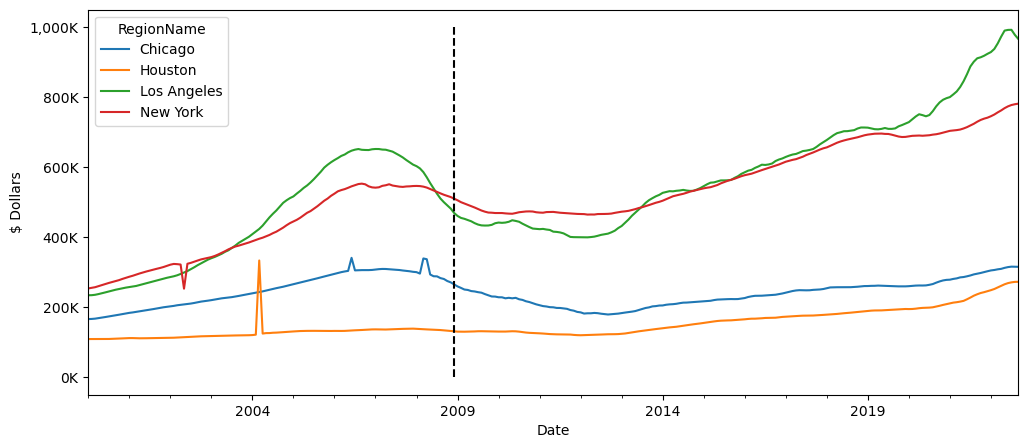

In [340]:
# Plot all cities
fig, ax = plt.subplots(figsize=(12,5))
unstacked.plot(ax=ax)
ax.vlines(index_2008,0,1000000, colors='k', linestyles='dashed')
ax.yaxis.set_major_formatter(fmt_thous)
ax.set_ylabel('$ Dollars');


- Which City had the highest Typical Home Value at the end of 2008? Which had the least?
    - Highest Typical Home Value at the end of 2008 is located at `New York` with Value of `510309.0` 

#### Answering Q2
- How much did the home values change from November 2008 to December 2008 (in dollars)?

In [330]:
# Get Difference between Nov to Dec 2008
diff_2008 = unstacked.loc['nov 2008':'dec 2008'].diff().dropna()
diff_2008

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-12-31,-5753.0,-964.0,-12611.0,-4458.0


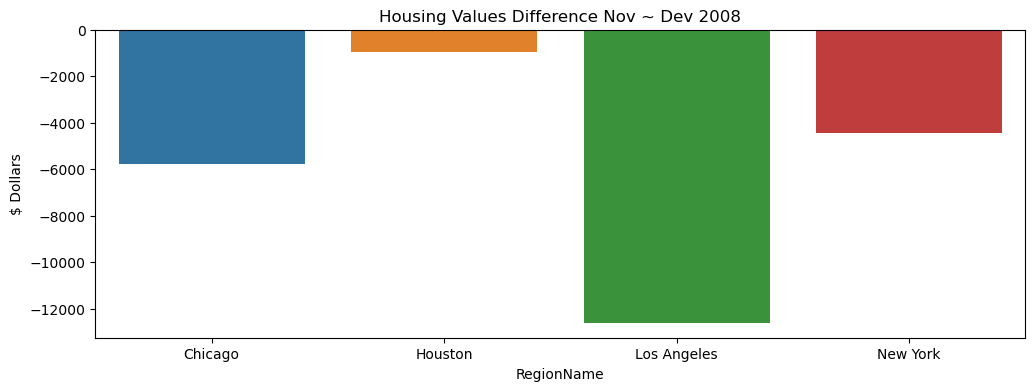

In [336]:
# Plot diff
ax = sns.barplot(data=diff_2008)
ax.set_title('Housing Values Difference Nov ~ Dev 2008')
ax.set_ylabel('$ Dollars');

- How much did the home values change from November 2008 to December 2008 (in dollars)?
    - Differences in Home Values between Nov ~ Dec 2008 are:
        - `Chicago: -$5732.0`
        - `Houstom: -$964.0`
        - `Los Angeles: -$12611.0`
        - `New York -$4458.0`